# 数据准备


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 数据获取

In [2]:
df=pd.read_csv('./Data/survey lung cancer.csv') #读取数据文件
df.head(5) #查看前5行数据

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**Note: In this dataset, YES=2 & NO=1**

## 描述性统计分析

In [3]:
df.describe()#观察数据

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df.describe().T   #观察数据，转置 DataFrame 的索引和列

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [5]:
explore=df.describe().T
explore['R']=explore['max']-explore['min'] #计算极差
explore['IQR']=explore['75%']-explore['25%'] #计算四分位差
explore['cv']=explore['std']/explore['mean'] 
explore['std2']=explore['std']**2 #计算方差
explore['median']=np.median(df.iloc[:,1]) #计算中位数
explore['mode']=np.argmax(np.bincount(df.iloc[:,1])) #计算众数

In [6]:
explore

,count,mean,std,min,25%,50%,75%,max,R,IQR,cv,std2,median,mode
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0,66.0,12.0,0.131002,67.409049,62.0,64
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.317832,0.246816,62.0,64
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.315969,0.245955,62.0,64
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.334233,0.250809,62.0,64
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.333512,0.250809,62.0,64
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.332781,0.250788,62.0,64
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.280806,0.220737,62.0,64
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.319656,0.247594,62.0,64
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.319656,0.247594,62.0,64
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.319656,0.247594,62.0,64


In [7]:
print('统计量情况：\n',explore.T)

统计量情况：
                AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count   309.000000  309.000000      309.000000  309.000000     309.000000   
mean     62.673139    1.563107        1.569579    1.498382       1.501618   
std       8.210301    0.496806        0.495938    0.500808       0.500808   
min      21.000000    1.000000        1.000000    1.000000       1.000000   
25%      57.000000    1.000000        1.000000    1.000000       1.000000   
50%      62.000000    2.000000        2.000000    1.000000       2.000000   
75%      69.000000    2.000000        2.000000    2.000000       2.000000   
max      87.000000    2.000000        2.000000    2.000000       2.000000   
R        66.000000    1.000000        1.000000    1.000000       1.000000   
IQR      12.000000    1.000000        1.000000    1.000000       1.000000   
cv        0.131002    0.317832        0.315969    0.334233       0.333512   
std2     67.409049    0.246816        0.245955    0.250809       0.2

# 数据预处理

In [8]:
df.shape

(309, 16)

In [9]:
#检查重复项
df.duplicated().sum()

33

In [10]:
#删除重复项
df=df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
# 检查 null 值 df.isnull().sum()
print('原始数据缺失值个数为：',sum(df.isnull().sum()))

原始数据缺失值个数为： 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [13]:
# 使用 sklearn 的 LabelEncoder 将它们转换为数值,我们将所有其他属性设为 YES=1 & NO=0。
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [14]:
#查看
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

检查变量分布情况

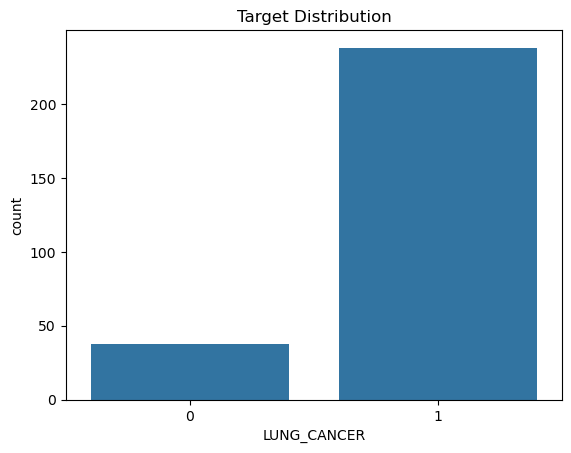

In [16]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

##### ***That is, Target Distribution is imbalanced.***

In [17]:
df['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

**我们做一些数据可视化，以便更好地理解独立特征是如何与目标变量相关的。.**

In [18]:
# 我们定义了一个名为plot的函数，该函数接受两个参数：col和df。col是要进行分组的列名，而df则是要进行操作的DataFrame。默认情况下，df的值为之前的全局DataFrame。
# 在函数内部，使用了groupby方法将DataFrame按照col列的值进行分组，然后在每个分组中通过value_counts(normalize=True)实现计算'LUNG_CANCER'列的值所占的比例。
# 然后，使用unstack()将分组后的数据转置，这样每个分组都会成为一个列，每个值对应一个分组。
# 最后，使用plot(kind='bar', figsize=(8,5))方法创建一个条形图，显示每个分组中'LUNG_CANCER'列的值所占的比例。图的大小设置为8x5。
# 'LUNG_CANCER'列的值被归一化（normalized），这意味着它们被转换为0到1之间的值

def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

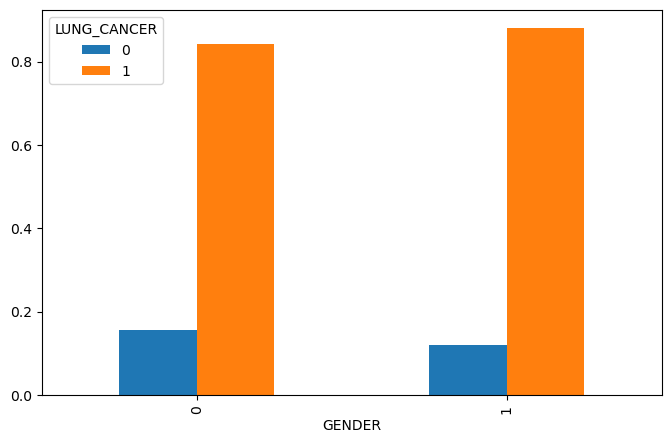

In [19]:
plot('GENDER')

<Axes: xlabel='AGE'>

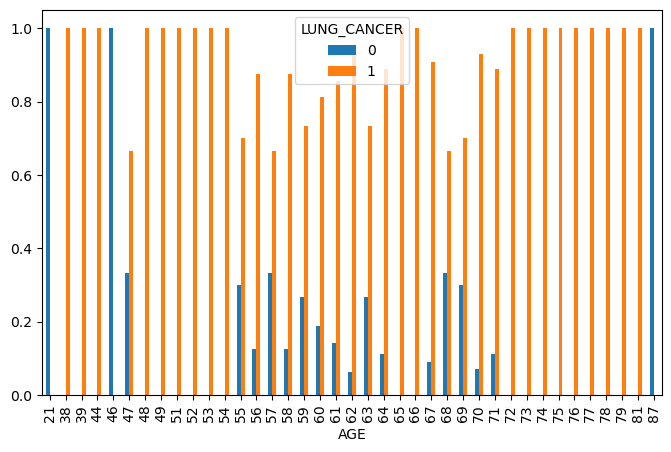

In [20]:
plot('AGE')

<Axes: xlabel='SMOKING'>

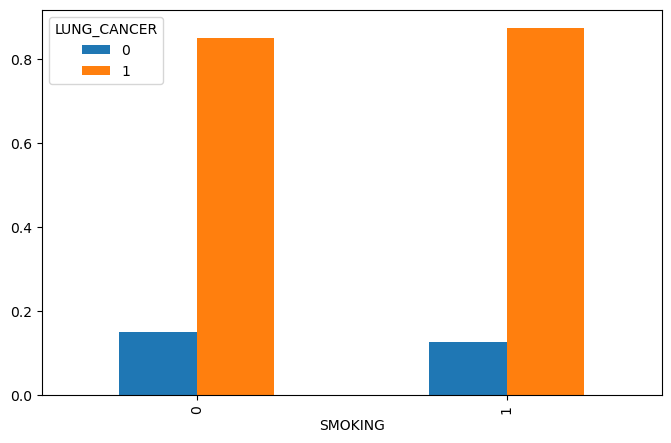

In [21]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

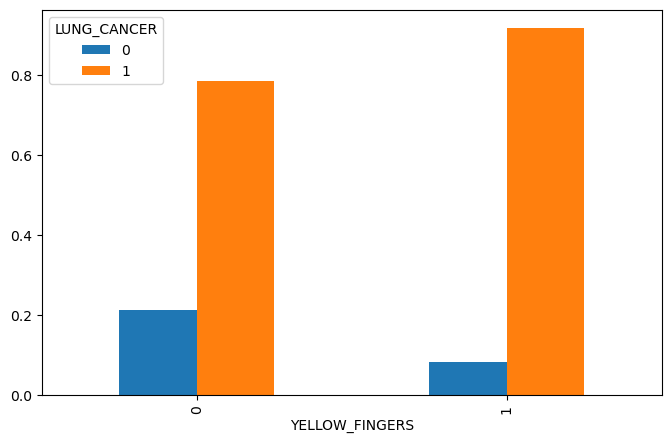

In [22]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

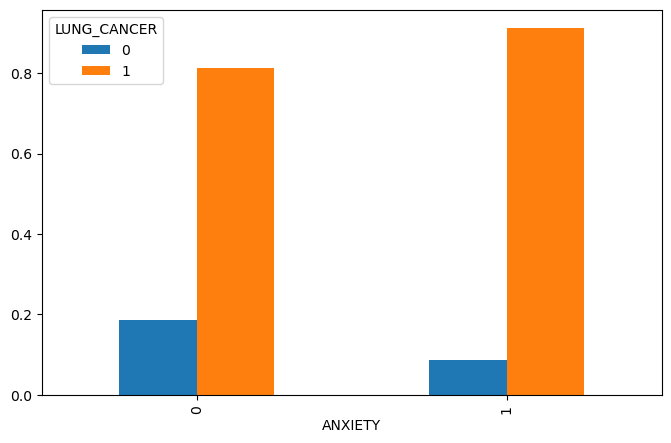

In [23]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

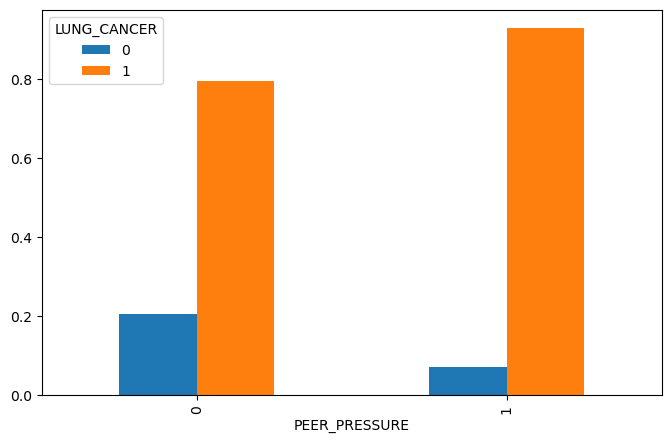

In [24]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

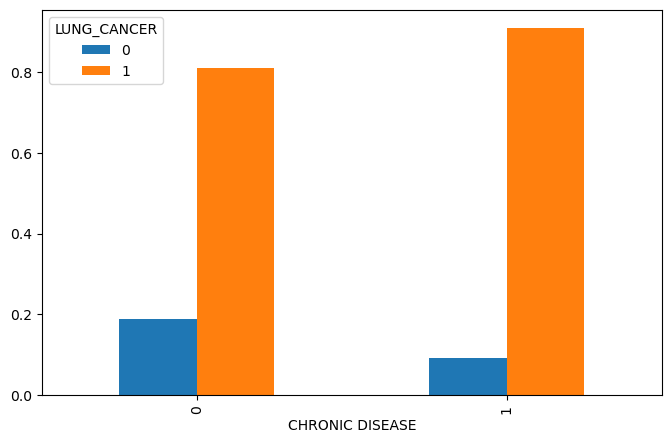

In [25]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

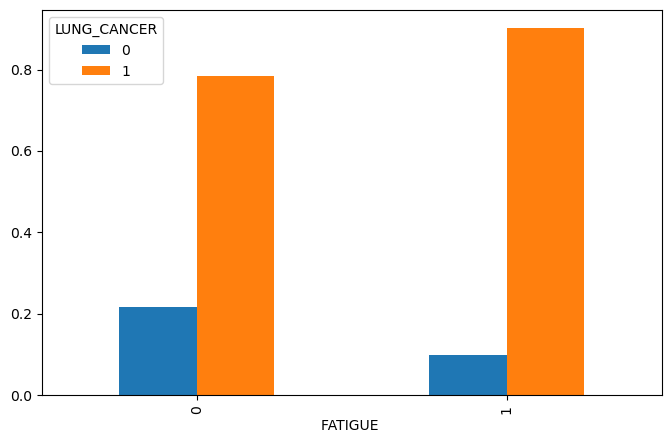

In [26]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

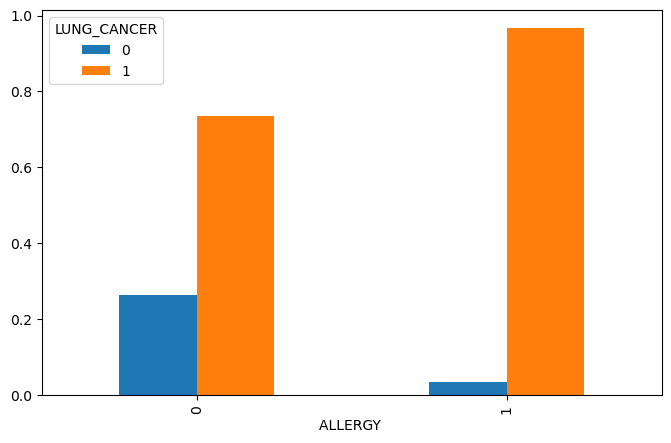

In [27]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

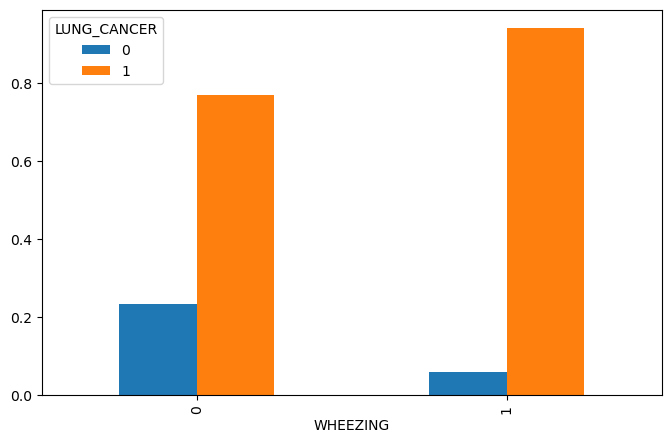

In [28]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

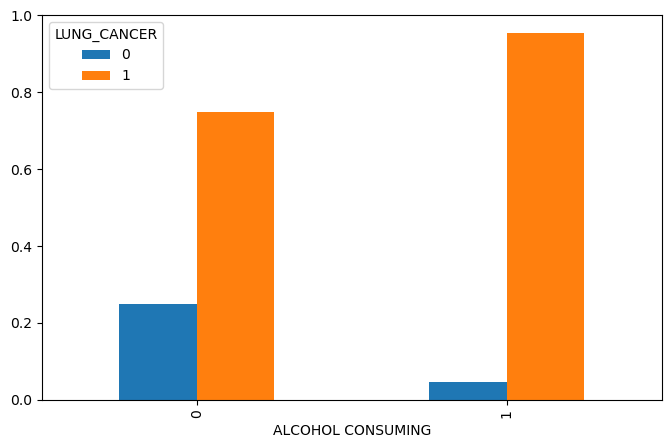

In [29]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

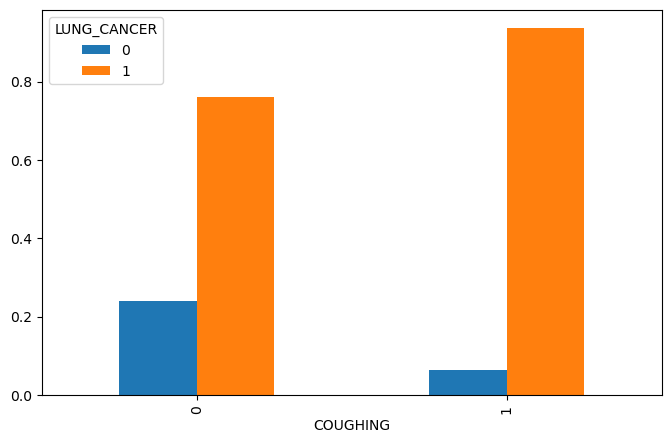

In [30]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

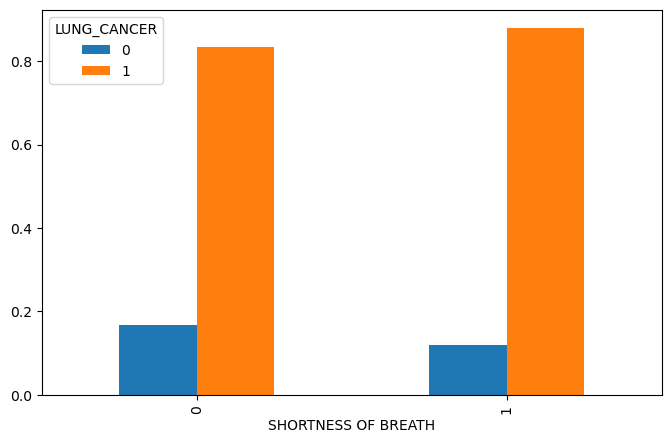

In [31]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

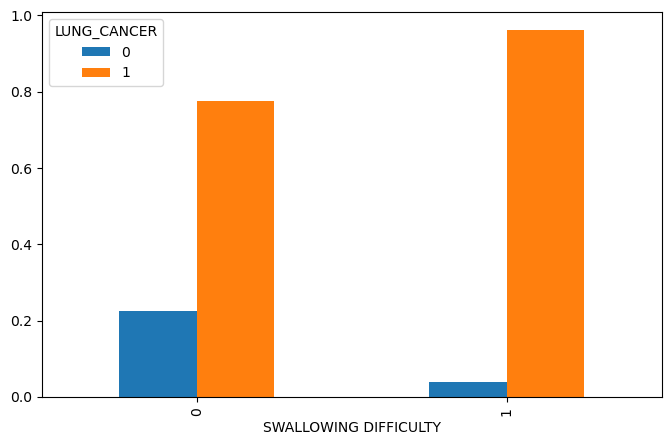

In [32]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

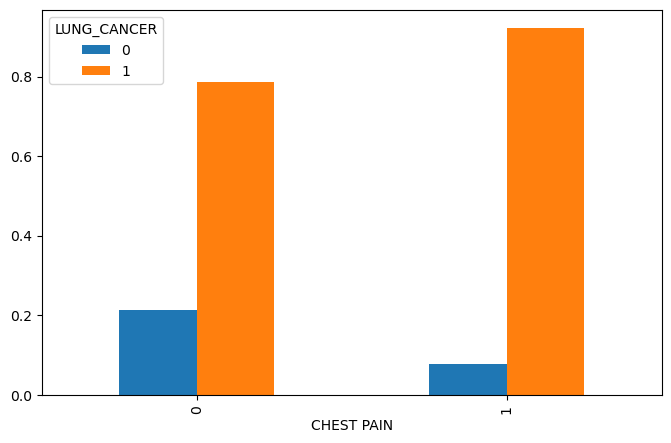

In [33]:
plot('CHEST PAIN')

**从可视化中可以清楚地看出，在给定的数据集中，性别、年龄、吸烟和呼吸短促等特征与肺癌的关系并不大。因此，我们去掉这些特征**

In [34]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [35]:
#检查相关性，计算皮尔逊相关系数
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


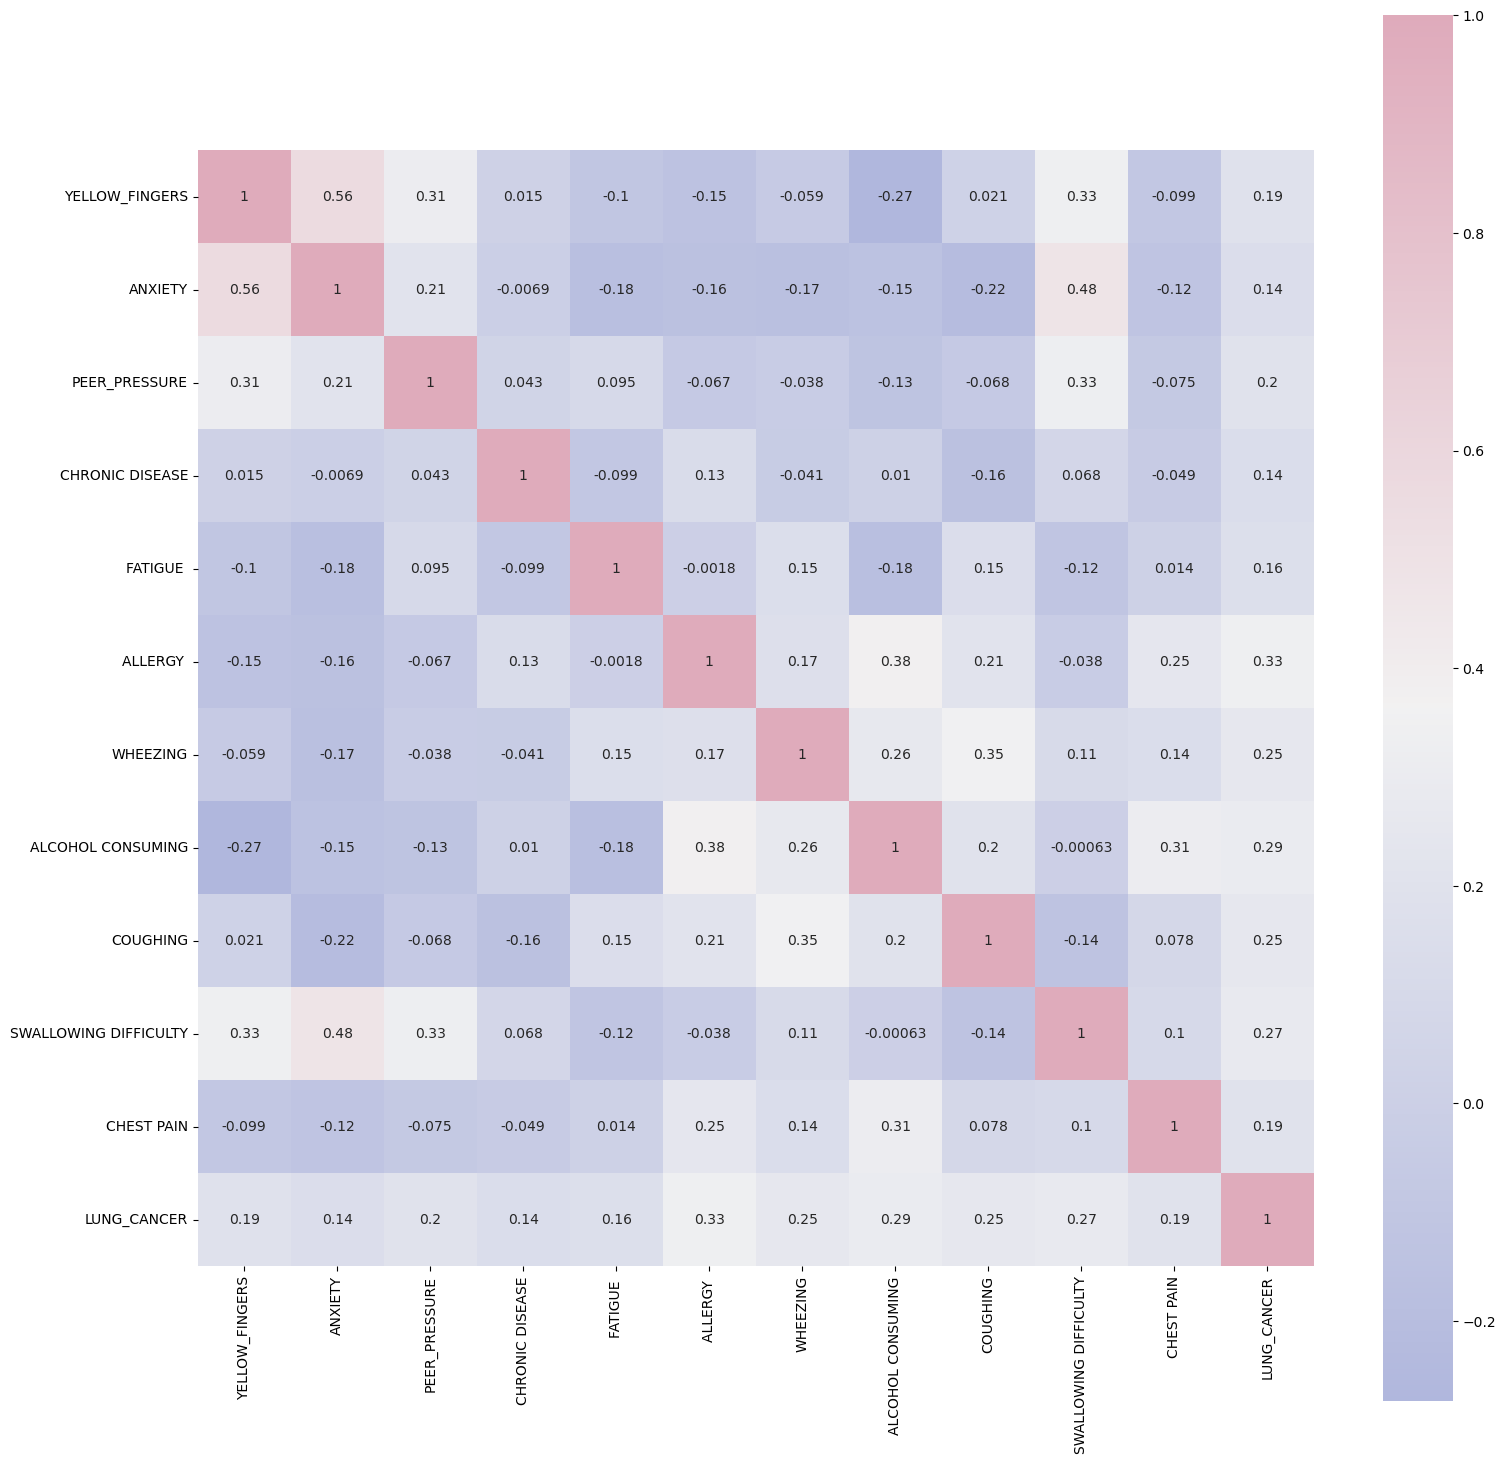

In [36]:
#创建一个热力图
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

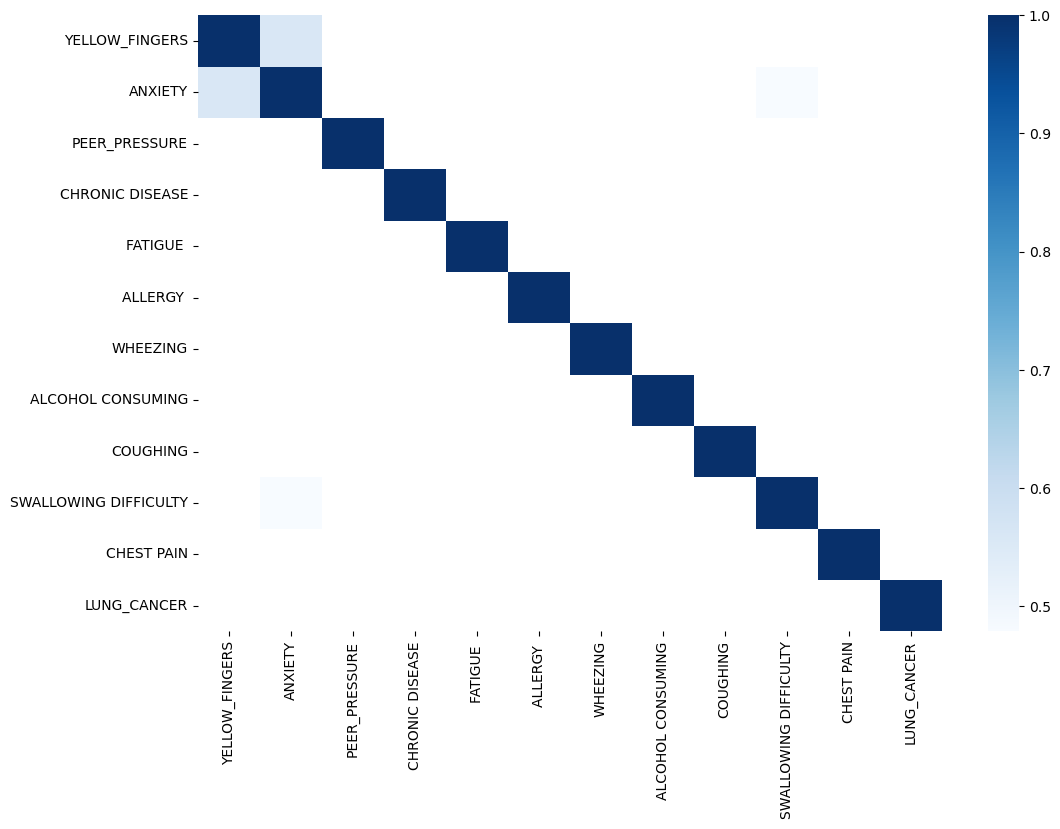

In [37]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

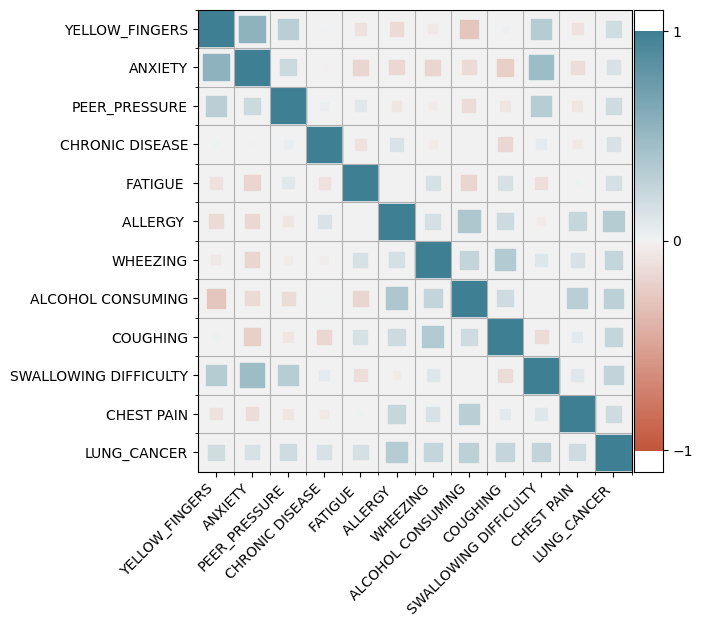

In [38]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(6,6))
corrplot(cn, size_scale=630)
plt.show()

# ***特征工程***
## 特征变换

***相关矩阵显示，ANXIETY和YELLOW_FINGERS的相关性超过50%。因此，我们创建一个新特征，将它们结合起来。***

In [39]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new.head(5)

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0


In [40]:
#分离自变量和因变量
X = df_new.drop('LUNG_CANCER', axis = 1)#从df_new这个DataFrame中移除列名为'LUNG_CANCER'的列，并将结果赋值给X
y = df_new['LUNG_CANCER'] #选择列名为'LUNG_CANCER'的列，并将结果赋值给y

## ***目标分配不平衡处理***

In [41]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [42]:
len(X)

471

**划分训练集和测试集**

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

# **决策树**
## 训练模型

In [53]:
# 将训练数据拟合到模型中
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
# 使用测试数据预测结果
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

## 结果分析

Confusion_matrix:
[[61  1]
 [ 3 53]]


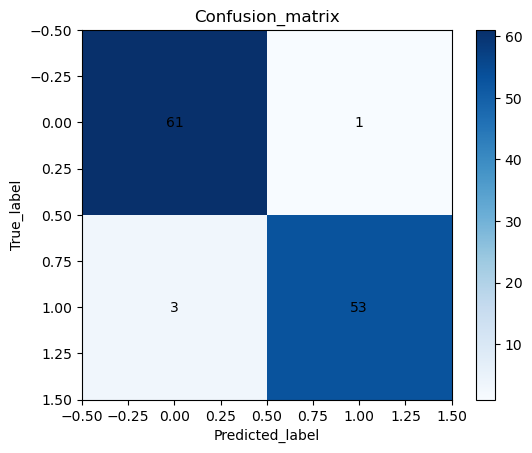

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_dt_pred)
#打印混淆矩阵
print("Confusion_matrix:")
print(cm)
#显示混淆矩阵
plt.imshow(cm,cmap='Blues')
plt.title('Confusion_matrix')
plt.colorbar( )
plt.xlabel('Predicted_label')
plt.ylabel('True_label')

rows,cols = cm.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j,i,cm[i,j],ha='center',va='center')

## 模型评估

In [56]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.98      0.95      0.96        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [57]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc 

auc值为 0.9651497695852534


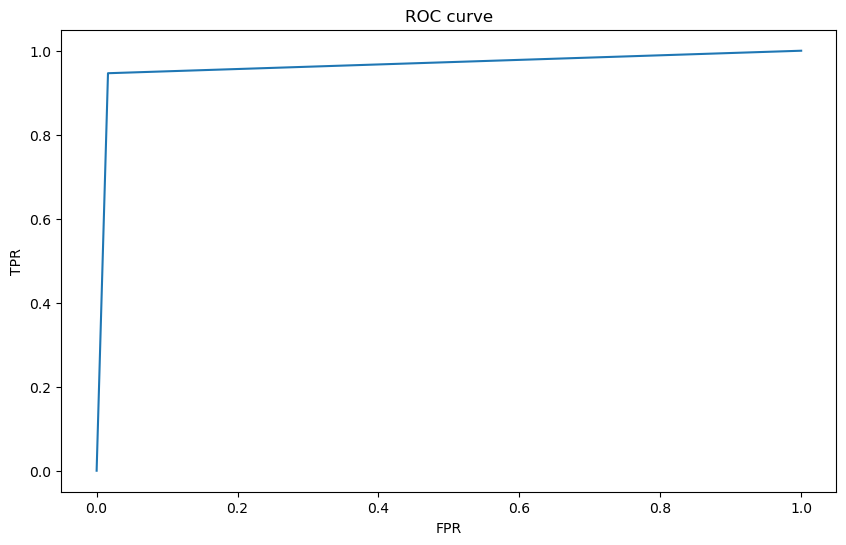

In [58]:
fpr,tpr,thresholds = roc_curve(y_test,y_dt_pred)# 求出ROC曲线的x轴和y轴
auc_score= auc(fpr,tpr)
print("auc值为", auc_score)# 求出auc值
plt.figure(figsize=(10,6))
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.show()

## 决策树可视化

In [59]:
from sklearn.tree import export_graphviz
import graphviz

In [60]:
import os
os.environ['PATH'] = os.pathsep + r"D:\Graphviz\bin"

In [61]:
# dot_data = export_graphviz(dt_model,out_file=None)

# graphgraphviz.Source(dot_data)
# graph.render("决策树可视化")

# **KNN分类器**

In [62]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

## 结果分析

Confusion_matrix:
[[62  0]
 [ 5 51]]


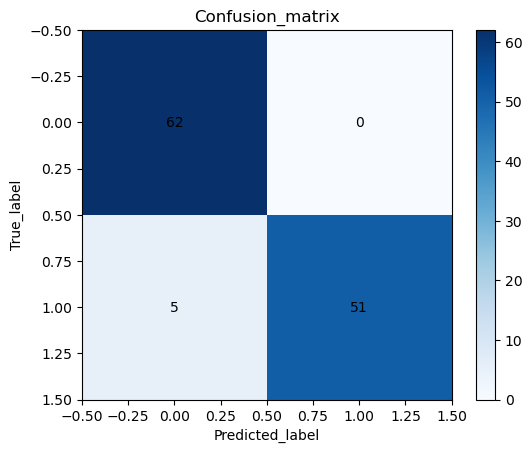

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_knn_pred)
#打印混淆矩阵
print("Confusion_matrix:")
print(cm)
#显示混淆矩阵
plt.imshow(cm,cmap='Blues')
plt.title('Confusion_matrix')
plt.colorbar( )
plt.xlabel('Predicted_label')
plt.ylabel('True_label')

rows,cols = cm.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j,i,cm[i,j],ha='center',va='center')

In [65]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        62
           1       1.00      0.91      0.95        56

    accuracy                           0.96       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.96      0.96      0.96       118



In [66]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc 

auc值为 0.9553571428571428


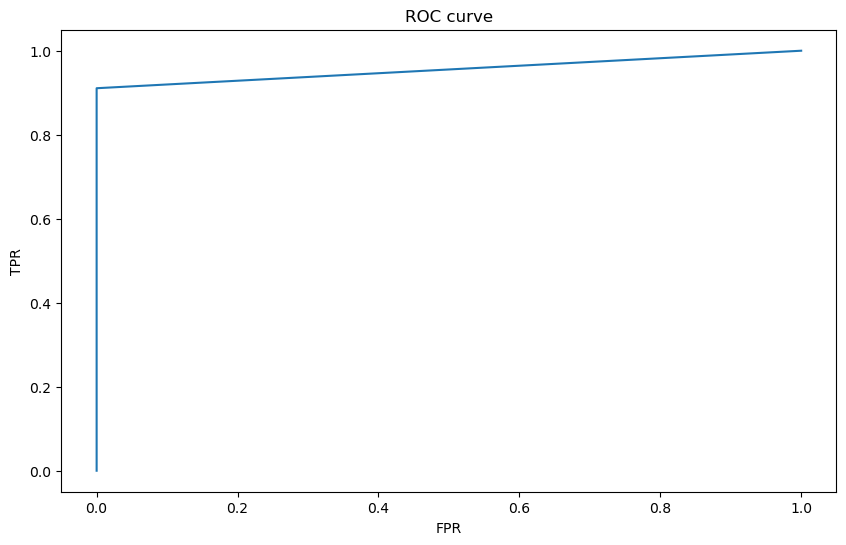

In [67]:
fpr,tpr,thresholds = roc_curve(y_test,y_knn_pred)# 求出ROC曲线的x轴和y轴
auc_score= auc(fpr,tpr)
print("auc值为", auc_score)# 求出auc值
plt.figure(figsize=(10,6))
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.show()

# **贝叶斯分类器**
## 训练模型

In [68]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [71]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

## 结果分析

Confusion_matrix:
[[56  6]
 [ 2 54]]


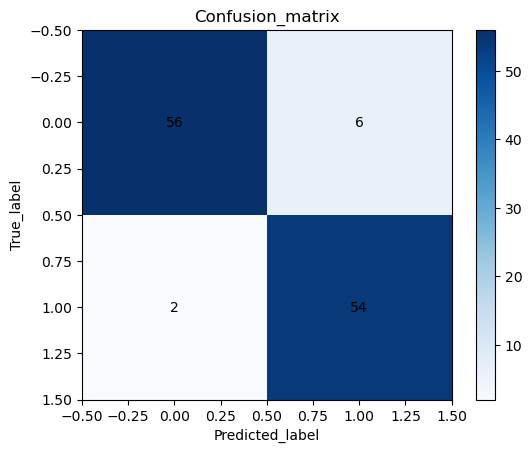

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_gnb_pred)
#打印混淆矩阵
print("Confusion_matrix:")
print(cm)
#显示混淆矩阵
plt.imshow(cm,cmap='Blues')
plt.title('Confusion_matrix')
plt.colorbar( )
plt.xlabel('Predicted_label')
plt.ylabel('True_label')

rows,cols = cm.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j,i,cm[i,j],ha='center',va='center')

## 模型评估

In [74]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.90      0.96      0.93        56

    accuracy                           0.93       118
   macro avg       0.93      0.93      0.93       118
weighted avg       0.93      0.93      0.93       118



In [76]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc 

auc值为 0.9337557603686636


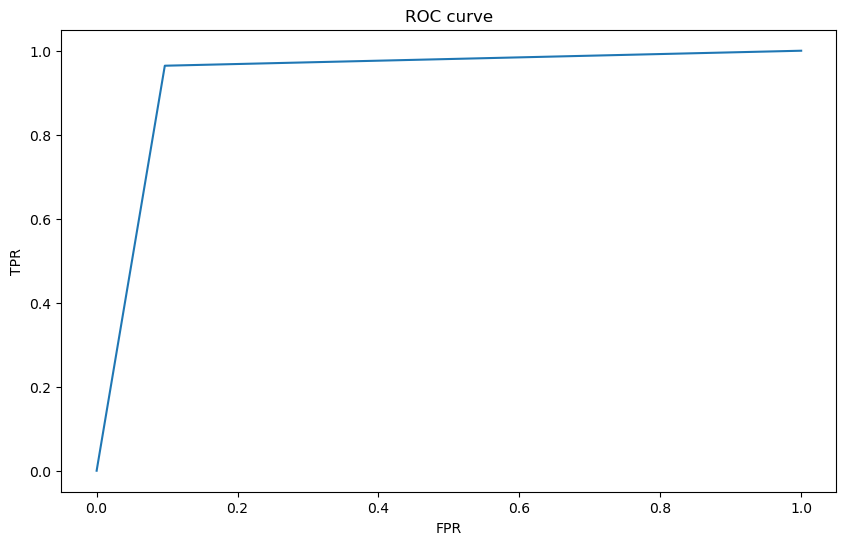

In [78]:
fpr,tpr,thresholds = roc_curve(y_test,y_gnb_pred)# 求出ROC曲线的x轴和y轴
auc_score= auc(fpr,tpr)
print("auc值为", auc_score)# 求出auc值
plt.figure(figsize=(10,6))
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.show()

# **支持向量机**
## 训练模型

In [79]:

from sklearn.svm import SVC
svc_model = SVC() #确定决策树参数
svc_model.fit(X_train, y_train) #拟合数据

SVC()

In [80]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred #预测

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
y_test.values #测试集数据

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

## 结果分析

Confusion_matrix:
[[59  3]
 [ 1 55]]


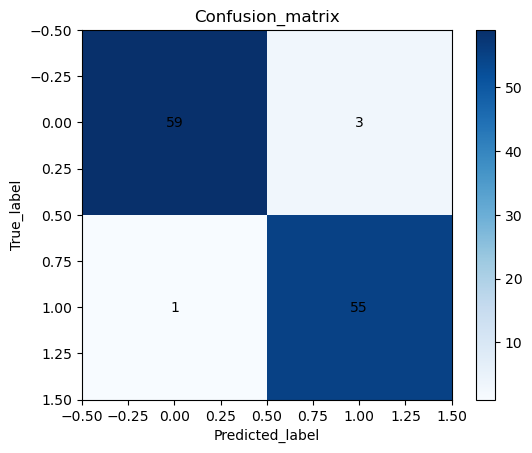

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_svc_pred)
#打印混淆矩阵
print("Confusion_matrix:")
print(cm)
#显示混淆矩阵
plt.imshow(cm,cmap='Blues')
plt.title('Confusion_matrix')
plt.colorbar( )
plt.xlabel('Predicted_label')
plt.ylabel('True_label')

rows,cols = cm.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j,i,cm[i,j],ha='center',va='center')
     
        

## 模型评估

In [83]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.95      0.98      0.96        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [84]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc  

auc值为 0.9668778801843319


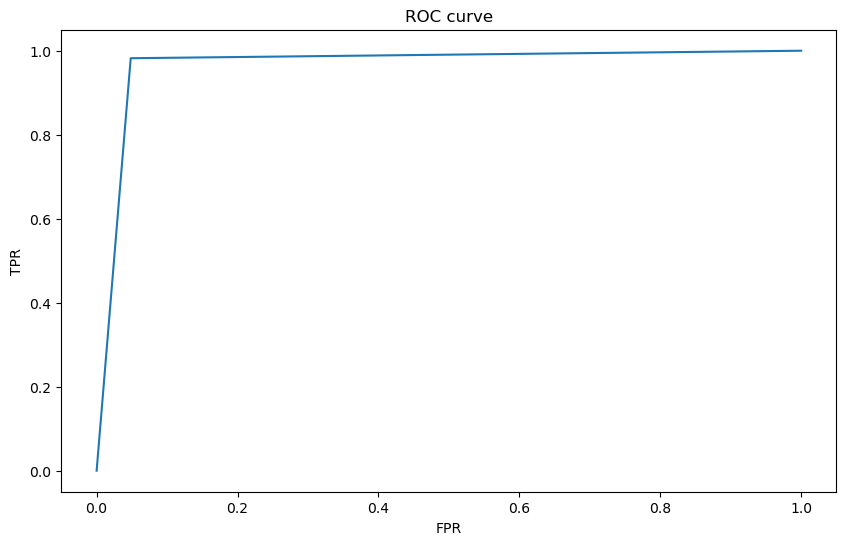

In [85]:
fpr,tpr,thresholds = roc_curve(y_test,y_svc_pred)# 求出ROC曲线的x轴和y轴
auc_score= auc(fpr,tpr)
print("auc值为", auc_score)# 求出auc值
plt.figure(figsize=(10,6))
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,tpr)
plt.show()